# Data Exploration in Jupyter

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import os
from urllib.request import urlretrieve
import pandas as pd
import numpy as np


URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data (filename = 'Fremont.csv', url=URL, force_download = False):
    if force_download or not os.path.exists(filename):
        urlretrieve(URL, 'Fremont.csv')
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['Total', 'East','West']
    return data

In [16]:
def test_fremont_data():
    data = get_fremont_data()
    assert all(data.columns == ['Total', 'East','West'])
    assert isinstance(data.index, pd.DatetimeIndex)
    assert len(np.unique(data.index.time)==24)

In [17]:
test_fremont_data()

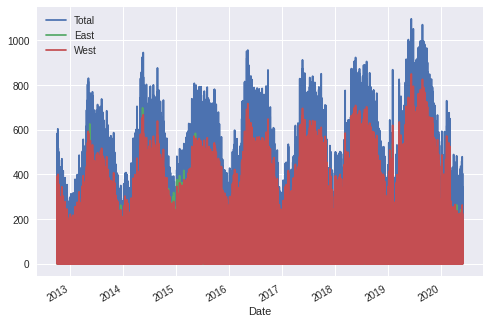

In [19]:
data.plot();

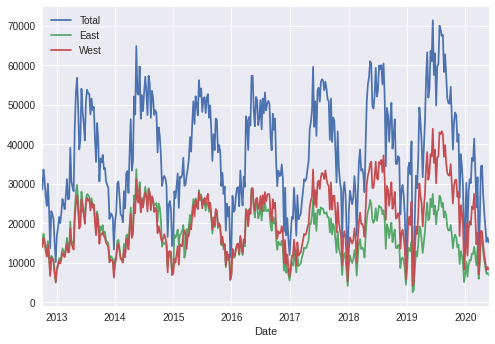

In [20]:
data.resample('W').sum().plot();

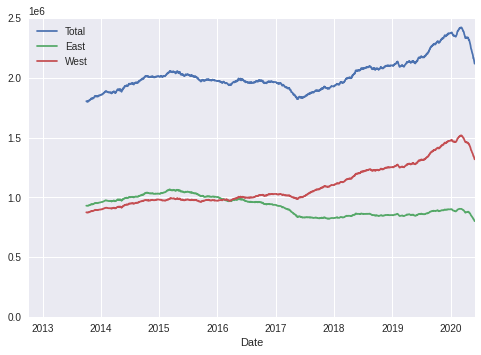

In [21]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

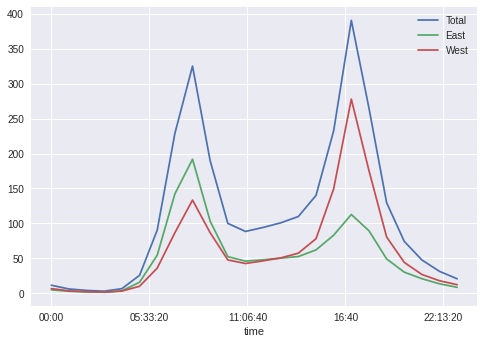

In [22]:
data.groupby(data.index.time).mean().plot();

In [23]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


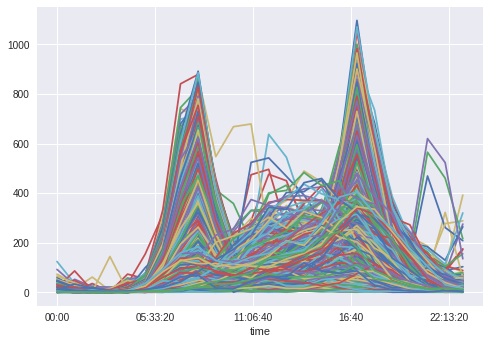

In [24]:
pivoted.plot(legend=False);

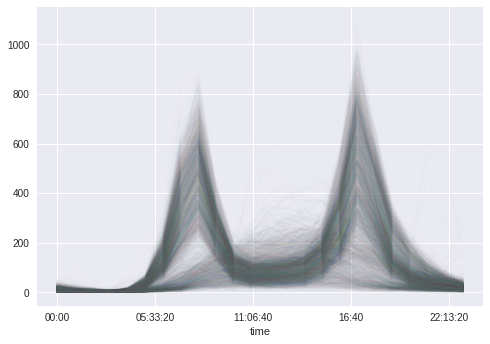

In [25]:
pivoted.plot(legend=False, alpha=0.01);

In [27]:
pivoted.shape

(24, 2798)

*The shape is 24 hours by 2798 days*

In [28]:
pivoted.T.shape

(2798, 24)

In [31]:
x=pivoted.fillna(0).T.values
x.shape

(2798, 24)

In [37]:
from sklearn.decomposition import PCA
x2 = PCA(2).fit_transform(x)

In [38]:
x2.shape

(2798, 2)

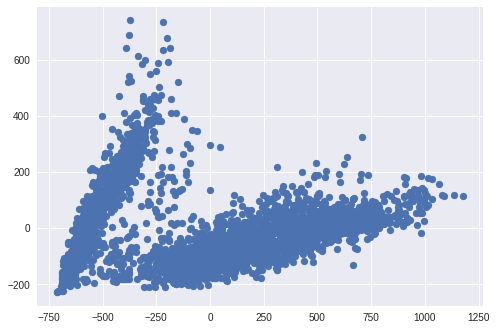

In [39]:
plt.scatter(x2[:,0],x2[:, 1]);

In [40]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(x)
labels = gmm.predict(x)
labels

array([1, 1, 1, ..., 0, 0, 0])

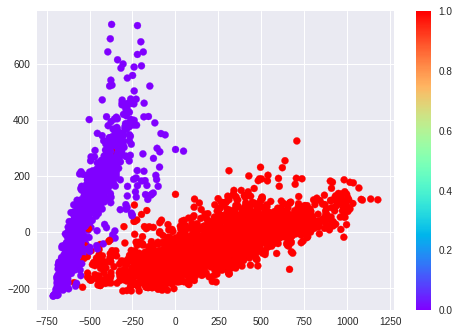

In [42]:
plt.scatter(x2[:,0],x2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

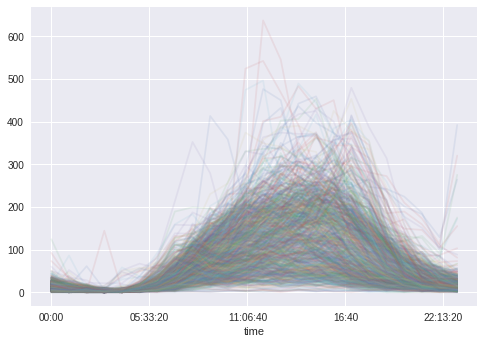

In [43]:
pivoted.T[labels==0].T.plot(legend=False, alpha=0.1)

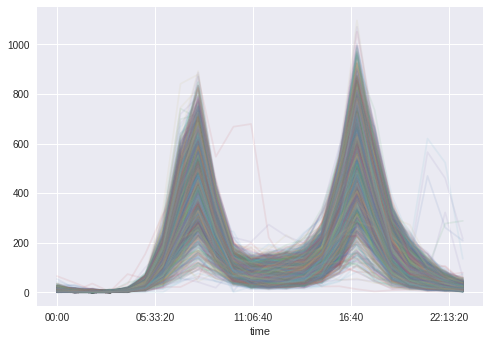

In [44]:
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1)

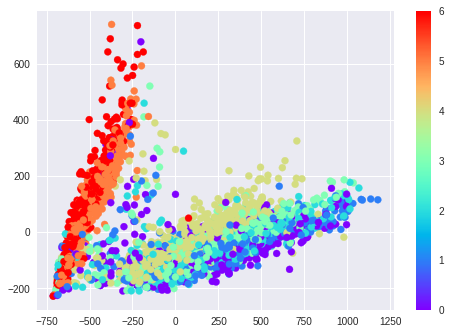

In [46]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(x2[:,0],x2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [49]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2020-03-05', '2020-03-06', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16',
               '2020-03-17', '2020-05-20'],
              dtype='datetime64[ns]', length=1873, freq=None)